# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to June 17th, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [166]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.info()
market_dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
1,Steinfurt,0,NaN,74.0,4.0,50,41.0,41.0,1.0,1884.468150
2,Magdeburg,0,NaN,83.0,28.0,28,188.0,187.0,6.0,1938.651093
3,Leipzig,0,NaN,61.0,28.0,12,597.0,594.0,21.0,1602.187431
4,Tamm,0,NaN,74.0,4.0,37,336.0,334.0,10.0,1931.884908


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

Your output should look like this:

In [167]:
print("Removing nulls\n")
market_dt=market_dt[(market_dt['Revenue'].isna()==False) 
                        & (market_dt['Sector'].isna()==False) & (market_dt['Legal_Form_Code'].isna()==False)
                    & (market_dt['CNT_CB_DENSITY'].isna()==False)& (market_dt['CNT_CB_MOB_DENSITY'].isna()==False)
                    & (market_dt['CNT_CB_FN_DENSITY'].isna()==False)]
print("The resulted lenght is:", len(market_dt))
market_dt.info()

Removing nulls

The resulted lenght is: 6987
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

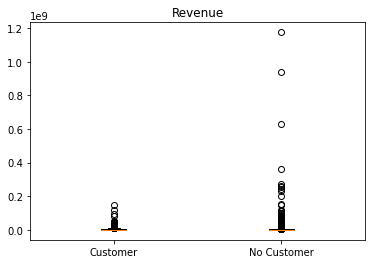

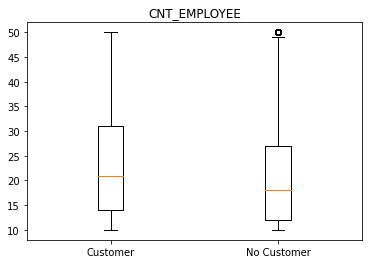

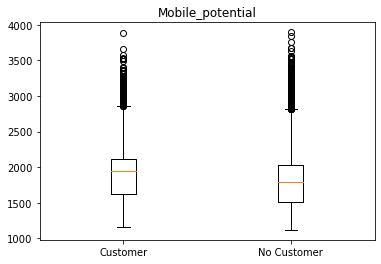

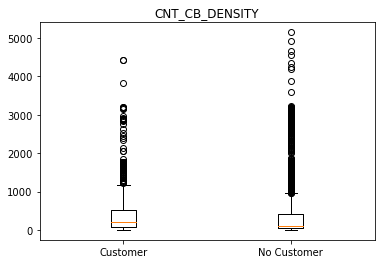

CNT_EMPLOYEE higher customer:  50
CNT_EMPLOYEE higher no customer:  50
Outliers customer:  95
Outliers No customer:  437

Quartiles Revenue:
Q1:  1047500.0
Q2:  2200000.0
Q3:  4195000.0

Quartiles Mobile Potencial:
Q1:  1621.0556861314792
Q2:  1948.4376609395997
Q3:  2116.47407406108


In [168]:
#Nuevos dataset de clintes actuales = 1 y no clientes = 0
customer_dt = market_dt[market_dt['Customer_Flag']==1];
noncustomer_dt = market_dt[market_dt['Customer_Flag']==0];

#Boxplot de Revenue, CNT_EMPLOYEE, Mobile_potential and CNT_CB_Density para ambos datasets

fig1, ax1 = pyplot.subplots() 
ax1.boxplot([customer_dt['Revenue'],noncustomer_dt['Revenue']], labels = ['Customer','No Customer'])
plt.title('Revenue')

fig2, ax2 = pyplot.subplots()
ax2.boxplot([customer_dt['CNT_EMPLOYEE'],noncustomer_dt['CNT_EMPLOYEE']],labels = ['Customer','No Customer'])
plt.title('CNT_EMPLOYEE')

fig3, ax3 = pyplot.subplots()
ax3.boxplot([customer_dt['Mobile_potential'],noncustomer_dt['Mobile_potential']],labels = ['Customer','No Customer'])
plt.title('Mobile_potential')

fig4, ax4 = pyplot.subplots()
ax4.boxplot([customer_dt['CNT_CB_DENSITY'],noncustomer_dt['CNT_CB_DENSITY']],labels = ['Customer','No Customer'])
plt.title('CNT_CB_DENSITY')

plt.show()



#Mayor num. de empleados
print("CNT_EMPLOYEE higher customer: ",customer_dt['CNT_EMPLOYEE'].max())
print("CNT_EMPLOYEE higher no customer: ",noncustomer_dt['CNT_EMPLOYEE'].max())

#outliers clientes
Q1 = np.quantile(customer_dt['Revenue'],.25) #Cuartil 1 
Q3 = np.quantile(customer_dt['Revenue'],.75)#Cuartil 3 
IQR = Q3-Q1 #rango intercuartil 
print("Outliers customer: ",np.sum((customer_dt['Revenue'] > Q3 + 1.5*IQR)*1))

Q1_No_Client = np.quantile(noncustomer_dt['Revenue'],.25)#Cuartil 1 no clientes
Q3_No_Client = np.quantile(noncustomer_dt['Revenue'],.75)
IQR_No_Client  = Q3_No_Client - Q1_No_Client;
print("Outliers No customer: ",np.sum((noncustomer_dt['Revenue'] > Q3 + 1.5*IQR)*1))

#Cuartiles Revenue:
print("\nQuartiles Revenue:") 
print("Q1: ",np.quantile(customer_dt['Revenue'],.25))
print("Q2: ",np.quantile(customer_dt['Revenue'],.50))
print("Q3: ",np.quantile(customer_dt['Revenue'],.75))

#Cuartiles Mobile_potential:
print("\nQuartiles Mobile Potencial:") 
print("Q1: ",np.quantile(customer_dt['Mobile_potential'],.25))
print("Q2: ",np.quantile(customer_dt['Mobile_potential'],.50))
print("Q3: ",np.quantile(customer_dt['Mobile_potential'],.75))






As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

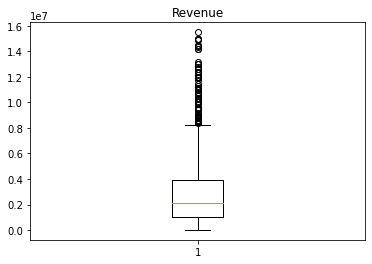

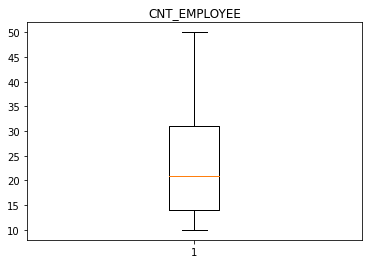

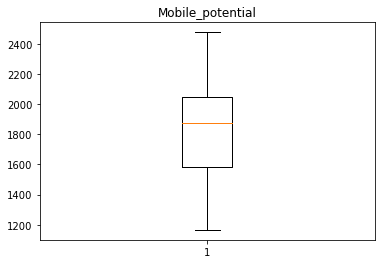

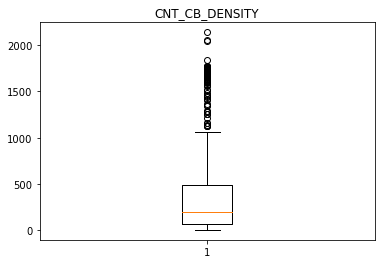

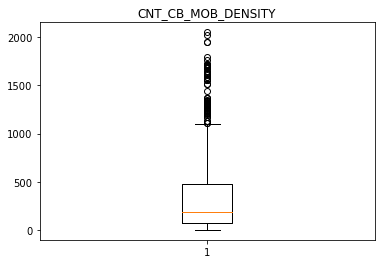

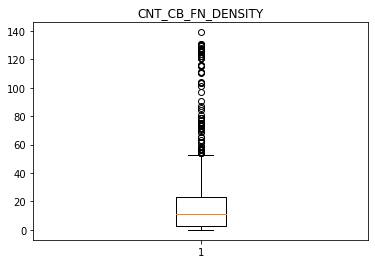

In [169]:
# Elimanamos valores altos 5*IQR para cada variable 

#Variable Revenue
Q1 = np.quantile(customer_dt['Revenue'],.25) 
Q3 = np.quantile(customer_dt['Revenue'],.75)
IQR = Q3-Q1
Revenue = customer_dt[customer_dt['Revenue']<= 5*IQR]['Revenue']

#Variable CNT_EMPLOYEE
Q1 = np.quantile(customer_dt['CNT_EMPLOYEE'],.25) 
Q3 = np.quantile(customer_dt['CNT_EMPLOYEE'],.75)
IQR = Q3-Q1
CNT_EMPLOYEE = customer_dt[customer_dt['CNT_EMPLOYEE']<= 5*IQR]['CNT_EMPLOYEE']

#Variable Mobile_potential
Q1 = np.quantile(customer_dt['Mobile_potential'],.25) 
Q3 = np.quantile(customer_dt['Mobile_potential'],.75)
IQR = Q3-Q1
Mobile_potential = customer_dt[customer_dt['Mobile_potential']<= 5*IQR]['Mobile_potential']

#Variable CNT_CB_DENSITY
Q1 = np.quantile(customer_dt['CNT_CB_DENSITY'],.25) 
Q3 = np.quantile(customer_dt['CNT_CB_DENSITY'],.75)
IQR = Q3-Q1
CNT_CB_DENSITY = customer_dt[customer_dt['CNT_CB_DENSITY']<= 5*IQR]['CNT_CB_DENSITY']

#Variable CNT_CB_MOB_DENSITY
Q1 = np.quantile(customer_dt['CNT_CB_MOB_DENSITY'],.25) 
Q3 = np.quantile(customer_dt['CNT_CB_MOB_DENSITY'],.75)
IQR = Q3-Q1
CNT_CB_MOB_DENSITY = customer_dt[customer_dt['CNT_CB_MOB_DENSITY']<= 5*IQR]['CNT_CB_MOB_DENSITY']

#Variable CNT_CB_FN_DENSITY
Q1 = np.quantile(customer_dt['CNT_CB_FN_DENSITY'],.25) 
Q3 = np.quantile(customer_dt['CNT_CB_FN_DENSITY'],.75)
IQR = Q3-Q1
CNT_CB_FN_DENSITY = customer_dt[customer_dt['CNT_CB_FN_DENSITY']<= 5*IQR]['CNT_CB_FN_DENSITY']

#Plot

fig1, ax1 = pyplot.subplots()
ax1.boxplot(Revenue)
plt.title('Revenue')


fig2, ax2 = pyplot.subplots()
ax2.boxplot(CNT_EMPLOYEE)
plt.title('CNT_EMPLOYEE')

fig3, ax3 = pyplot.subplots()
ax3.boxplot(Mobile_potential)
plt.title('Mobile_potential')

fig4, ax4 = pyplot.subplots()
ax4.boxplot(CNT_CB_DENSITY)
plt.title('CNT_CB_DENSITY')

fig5, ax5 = pyplot.subplots()
ax5.boxplot(CNT_CB_MOB_DENSITY)
plt.title('CNT_CB_MOB_DENSITY')

fig6, ax6 = pyplot.subplots()
ax6.boxplot(CNT_CB_FN_DENSITY)
plt.title('CNT_CB_FN_DENSITY')
plt.show()


On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [170]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [171]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt.loc[:,'City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt.loc[:,'City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

C:\Users\Loly\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Loly\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [172]:
customer_dt.head()

y_customer=customer_dt.groupby(['City_coded'])['City'].count()
y_noncustomer =noncustomer_dt.groupby(['City_coded'])['City'].count()
print("Customer: ",sum(y_customer))
print("No Customer: ",sum(y_noncustomer))
ratio= sum(y_noncustomer)/sum(y_customer)
print("Ratio: ",ratio) 

Customer:  1111
No Customer:  5876
Ratio:  5.288928892889289


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [173]:
#Creamos el final datset

dataset_C1 = customer_dt[['City_coded','Revenue','Sector','Legal_Form_Code','CNT_EMPLOYEE','CNT_CB_DENSITY','CNT_CB_MOB_DENSITY','CNT_CB_FN_DENSITY','Mobile_potential']].dropna() #eliminamos nulls
dataset_C1[['Target']] = 1;#Creamos nueva columna Target con 1 para clientes

dataset_C0 = noncustomer_dt[['City_coded','Revenue','Sector','Legal_Form_Code','CNT_EMPLOYEE','CNT_CB_DENSITY','CNT_CB_MOB_DENSITY','CNT_CB_FN_DENSITY','Mobile_potential']].dropna()
dataset_C0[['Target']] = 0;#Creamos nueva columna Target con 0 para no clientes

final_dataset = dataset_C1.append(dataset_C0)

The output should look like this:

In [174]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
11548,824,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,1
11551,759,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,1
11553,467,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,1
11554,623,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,1
11565,221,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,1


In [175]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
11542,771,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998,0
11543,1961,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840,0
11544,627,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002,0
11545,2011,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202,0
11546,1035,4593054.0,64.0,14.0,41,90.0,90.0,5.0,1985.888315,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [176]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.2, random_state=42) 

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [177]:

print("Lenght X_Train: ",np.size(X_train))
print("Lenght X_Test: ",np.size(X_test))
X_train_per = np.size(X_train)/(np.size(X_train) + np.size(X_test))
print("Train: ",round(X_train_per, 2)*100,"%")

Lenght X_Train:  50301
Lenght X_Test:  12582
Train:  80.0 %


[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

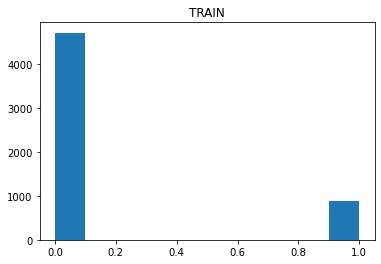

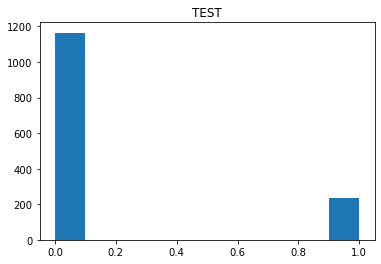

In [178]:
#Histogram y_train
plt.figure()
plt.hist(y_train)
plt.title('TRAIN')
plt.show()

#Histogram y_test
plt.figure()
plt.hist(y_test)
plt.title('TEST')
plt.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [179]:
#Creamos un model basado en Support Vector Machine
model_SVC = SVC(kernel="rbf")
model_SVC.fit(X_train, y_train) #Entrenamos el modelo
y_pred_SVC = model_SVC.predict(X_test) #Test

result_SVC=model_SVC.score(X_test, y_test) #Print the score of the trained model
result_SVC_train=model_SVC.score(X_train, y_train) #Print the score of the trained model
y_pred_SVC_train=model_SVC.predict(X_train) #Test the trained model with test samples

print(classification_report(y_test,y_pred_SVC))
print(confusion_matrix(y_test,y_pred_SVC))

print(classification_report(y_train,y_pred_SVC_train))
print(confusion_matrix(y_train,y_pred_SVC_train))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1165
           1       0.00      0.00      0.00       233

    accuracy                           0.83      1398
   macro avg       0.42      0.50      0.45      1398
weighted avg       0.69      0.83      0.76      1398

[[1165    0]
 [ 233    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4711
           1       0.00      0.00      0.00       878

    accuracy                           0.84      5589
   macro avg       0.42      0.50      0.46      5589
weighted avg       0.71      0.84      0.77      5589

[[4711    0]
 [ 878    0]]


C:\Users\Loly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [180]:
#Clasificador basado en Decision Tree

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)

result_DT=model_DT.score(X_test, y_test)

print(classification_report(y_test,y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1165
           1       0.29      0.32      0.30       233

    accuracy                           0.76      1398
   macro avg       0.58      0.58      0.58      1398
weighted avg       0.77      0.76      0.76      1398

[[981 184]
 [158  75]]


### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

Model SVM with accuracy (mean): 0.842905707640007 and accuracy (std): 0.003542492373094188
Model Decision_trees with accuracy (mean): 0.7534442655215603 and accuracy (std): 0.004827603350592987


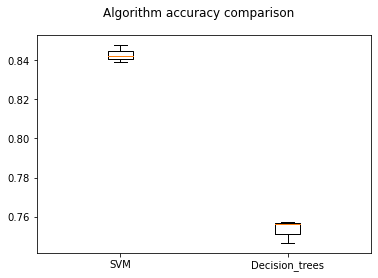

In [181]:
#Models definition
models=[]
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier()))
#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=3, random_state=10,shuffle = True)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())



#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The output of the boxplots should look like this:

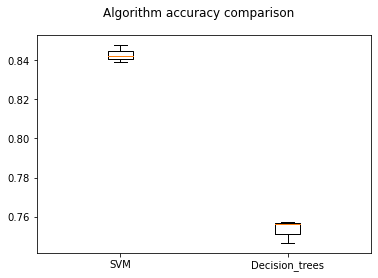

In [182]:
#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


In [183]:
#Num de muestras para cada clase
customer_dt = final_dataset[final_dataset['Target']==1];
noncustomer_dt = final_dataset[final_dataset['Target']==0];
print("Customers: ",len(customer_dt))
print("No customers: ",len(noncustomer_dt))

Customers:  1111
No customers:  5876


Let's undersample the `noncustomer_dt` to balance both datasets:

In [184]:
noncustomer_dt_sample=noncustomer_dt.sample(1111) #recortamos el que tiene menor valor
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 1111


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

<AxesSubplot:>

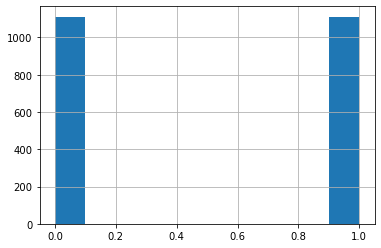

In [185]:
final_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset=final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [186]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.33, random_state=42) 

#Support Vector Machine con datos balanceados
print("\n Support Vector Machine\n")
model_SVC = SVC(kernel="rbf")#Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) #Entrenamos el modelo
y_pred_SVC=model_SVC.predict(X_test) #Test 

#printemaos los scores de los modelos entrenados y testeamos el modelo
result_SVC=model_SVC.score(X_test,y_test)#Print the score of the trained model

print(classification_report(y_test, y_pred_SVC))
print(confusion_matrix(y_test, y_pred_SVC))

#Decision Tree con datos balanceados
print("\n Decision Tree\n")
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)

result_DT=model_DT.score(X_test, y_test)

print(classification_report(y_test,y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))




 Support Vector Machine

              precision    recall  f1-score   support

           0       0.50      0.84      0.63       349
           1       0.64      0.25      0.36       385

    accuracy                           0.53       734
   macro avg       0.57      0.55      0.49       734
weighted avg       0.57      0.53      0.49       734

[[294  55]
 [289  96]]

 Decision Tree

              precision    recall  f1-score   support

           0       0.55      0.60      0.57       349
           1       0.60      0.56      0.58       385

    accuracy                           0.57       734
   macro avg       0.58      0.58      0.57       734
weighted avg       0.58      0.57      0.58       734

[[208 141]
 [171 214]]


### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [187]:
cf1 = SVC() #clasificador de SVM
cf2 = DecisionTreeClassifier() #clasificador de DT

cf = VotingClassifier(estimators=[('SVC',cf1), ('DT', cf2)], voting='hard');
cf = cf.fit(X_train, y_train)
y_pred_cf=cf.predict(X_test)

print(classification_report(y_test, y_pred_cf))
print(confusion_matrix(y_test, y_pred_cf))

              precision    recall  f1-score   support

           0       0.50      0.91      0.64       349
           1       0.67      0.16      0.26       385

    accuracy                           0.52       734
   macro avg       0.58      0.54      0.45       734
weighted avg       0.59      0.52      0.44       734

[[319  30]
 [324  61]]


### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [188]:
#Random Forest
RFcf = RandomForestClassifier()
RFcf = RFcf.fit(X_train, y_train)
y_pred_RFcf=RFcf.predict(X_test)

print("Random Forest\n")
print(classification_report(y_test, y_pred_RFcf))
print(confusion_matrix(y_test, y_pred_RFcf))

Random Forest

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       349
           1       0.66      0.56      0.61       385

    accuracy                           0.62       734
   macro avg       0.62      0.62      0.62       734
weighted avg       0.62      0.62      0.62       734

[[235 114]
 [168 217]]


[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

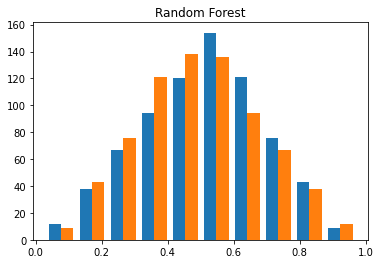

In [189]:
Prob_RFcf = RFcf.predict_proba(X_test)

plt.figure()
plt.hist(Prob_RFcf)
plt.title('Random Forest')
plt.show()

### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [190]:
#Gradient Tree Boosting
model_GBT = GradientBoostingClassifier()
model_GBT = model_GBT.fit(X_train, y_train)
y_pred_GBT = model_GBT.predict(X_test)

print("Gradient Boosting Classifier:\n")
print(classification_report(y_test, y_pred_GBT))
print(confusion_matrix(y_test, y_pred_GBT))

Gradient Boosting Classifier:

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       349
           1       0.64      0.56      0.60       385

    accuracy                           0.60       734
   macro avg       0.61      0.61      0.60       734
weighted avg       0.61      0.60      0.60       734

[[226 123]
 [168 217]]


[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

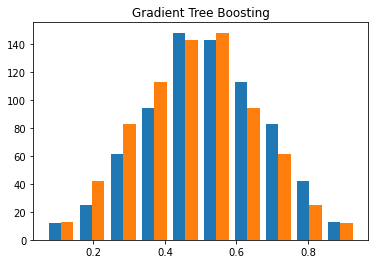

In [191]:
Prob_GBT = model_GBT.predict_proba(X_test)

plt.figure()
plt.hist(Prob_GBT)
plt.title('Gradient Tree Boosting')
plt.show()

# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




In [192]:
Prob_GBT = model_GBT.predict_proba(X_test)

for i in range(11):
    t = 0.1*i    
    y_pred = (Prob_GBT[:,1] >t)*1
    print(t)
    print(classification_report(y_test, y_pred))
print(y_test)

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       349
           1       0.52      1.00      0.69       385

    accuracy                           0.52       734
   macro avg       0.26      0.50      0.34       734
weighted avg       0.28      0.52      0.36       734

0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       349
           1       0.52      1.00      0.69       385

    accuracy                           0.52       734
   macro avg       0.26      0.50      0.34       734
weighted avg       0.28      0.52      0.36       734

0.2
              precision    recall  f1-score   support

           0       0.79      0.07      0.14       349
           1       0.54      0.98      0.70       385

    accuracy                           0.55       734
   macro avg       0.66      0.53      0.42       734
weighted avg       0.66      0.55      0.43       734

0.30000

C:\Users\Loly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [208]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=model_GBT.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])
    
df = pd.DataFrame(features_importance, columns = ["Name","Importance"]);

[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [210]:
#Anrtes del order
print(df)
#ordena
df.sort_values(by=['Importance'],ascending=[False])

                 Name  Importance
0          City_coded    0.122325
1             Revenue    0.135264
2              Sector    0.080473
3     Legal_Form_Code    0.059669
4        CNT_EMPLOYEE    0.078445
5      CNT_CB_DENSITY    0.114590
6  CNT_CB_MOB_DENSITY    0.115110
7      CNT_CB_FN_DENS    0.052949
8    Mobile_potential    0.241175


,Name,Importance
8,Mobile_potential,0.241175
1,Revenue,0.135264
0,City_coded,0.122325
6,CNT_CB_MOB_DENSITY,0.115110
5,CNT_CB_DENSITY,0.114590
2,Sector,0.080473
4,CNT_EMPLOYEE,0.078445
3,Legal_Form_Code,0.059669
7,CNT_CB_FN_DENS,0.052949


 [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of an **existing mobile tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today the mobile tariff is not very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`monthly data traffic` vs `monthly voice traffic`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `monthly data traffic` and `monthly voice traffic` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- According to the previous plane, which are the customers to be phoned to sell the mobile tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**